#### 3회차 Assignment
winequality-red 데이터에서 residual sugar를 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

분류 문제를 해결할 때 winequality-red.csv 파일이 쉼표가 아닌 세미콜론으로 클래스들이 구분되어 있으므로 명령어를 통해 세미콜론을 쉽표로 바꿔준 파일 redwine.csv를 활용하자.

In [2]:
df =pd.read_csv('C:/Users/yoojm/AIStudy/practice/Dataset/redwine.csv', index_col=0)
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [3]:
y = df['residual sugar']
y

fixed acidity
7.4     1.9
7.8     2.6
7.8     2.3
11.2    1.9
7.4     1.9
       ... 
6.2     2.0
5.9     2.2
6.3     2.3
5.9     2.0
6.0     3.6
Name: residual sugar, Length: 1599, dtype: float64

In [4]:
x = df.drop('residual sugar', axis=1)
x

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,
7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [5]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 10), (400, 10), (1199,), (400,))

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [7]:
# SVR
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print(clf_svm.score(x_train, y_train))

0.04083951024142407


In [8]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.197416855083247


In [9]:
# LR
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print(clf_lr.score(x_train, y_train))

0.29637481070399097


In [10]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0714712747390223


In [11]:
# DT

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print(clf_dt.score(x_train, y_train))

1.0


In [12]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.0774912992688155


In [13]:
# RF
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

pred_rf = rf_clf.predict(x_test)

print(rf_clf.score(x_train, y_train))

0.942563719762355


In [14]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.912466481918651


0.07731497817558719


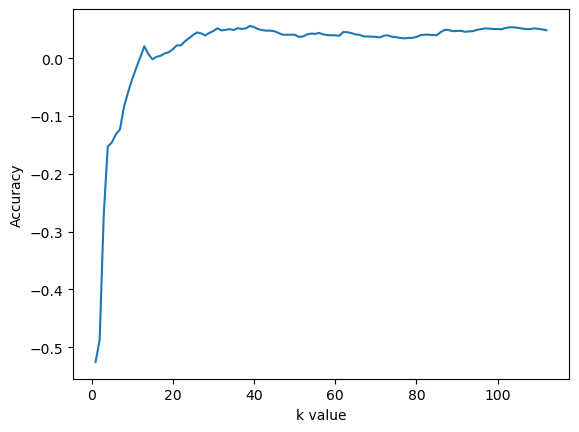

In [15]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  KNR = KNeighborsRegressor(n_neighbors = k)
  KNR.fit(x_train, y_train.values.ravel())

  find_accuracy.append(KNR.score(x_test, y_test))
  
pred_KNR = KNR.predict(x_test)
print(KNR.score(x_train, y_train))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [16]:
mse = np.sqrt(mean_squared_error(pred_KNR, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.152704826256059


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import make_pipeline

# Load the Wine Quality dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Classify 'quality' (classification problem)
X_classification = wine_data.drop('quality', axis=1)
y_classification = wine_data['quality']

# Regression for 'residual sugar' (regression problem)
X_regression = wine_data.drop('residual sugar', axis=1)
y_regression = wine_data['residual sugar']

# Split the data for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.25, random_state=0
)

# Split the data for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.25, random_state=0
)

# Check and handle missing values
print("Missing values before handling:", wine_data.isnull().sum().sum())
wine_data = wine_data.dropna()  # Remove rows with missing values
print("Missing values after handling:", wine_data.isnull().sum().sum())

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, task):
    # PolynomialFeatures
    degree = 2
    model_pipe = make_pipeline(PolynomialFeatures(degree), model)

    # Scalers
    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    for scaler in scalers:
        model_pipe.steps[1] = (scaler, model)
        model_pipe.fit(X_train, y_train)

        if task == "classification":
            y_pred = model_pipe.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"{model.__class__.__name__} with {scaler.__class__.__name__}: Accuracy = {accuracy:.4f}")
        elif task == "regression":
            y_pred = model_pipe.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            print(f"{model.__class__.__name__} with {scaler.__class__.__name__}: MSE = {mse:.4f}")

# Models for classification
classification_models = [
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
]

# Models for regression
regression_models = [
    SVR(),
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    KNeighborsRegressor(),
]

# Train and evaluate classification models
print("\nClassification Task:")
for model in classification_models:
    train_and_evaluate_model(model, X_train_classification, X_test_classification, y_train_classification, y_test_classification, "classification")

# Train and evaluate regression models
print("\nRegression Task:")
for model in regression_models:
    train_and_evaluate_model(model, X_train_regression, X_test_regression, y_train_regression, y_test_regression, "regression")


Missing values before handling: 0
Missing values after handling: 0

Classification Task:


TypeError: keywords must be strings

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import make_pipeline

# Load the Wine Quality dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Classify 'quality' (classification problem)
X_classification = wine_data.drop('quality', axis=1)
y_classification = wine_data['quality']

# Regression for 'residual sugar' (regression problem)
X_regression = wine_data.drop('residual sugar', axis=1)
y_regression = wine_data['residual sugar']

# Split the data for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.25, random_state=0
)

# Split the data for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.25, random_state=0
)

# Check and handle missing values
print("Missing values before handling:", wine_data.isnull().sum().sum())
wine_data = wine_data.dropna()  # Remove rows with missing values
print("Missing values after handling:", wine_data.isnull().sum().sum())

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, task):
    # PolynomialFeatures
    degree = 2
    model_pipe = make_pipeline(PolynomialFeatures(degree=degree), model)

    # Scalers
    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    for scaler in scalers:
        model_pipe.steps[1] = (scaler, model)
        model_pipe.fit(X_train, y_train)

        if task == "classification":
            y_pred = model_pipe.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"{model.__class__.__name__} with {scaler.__class__.__name__}: Accuracy = {accuracy:.4f}")
        elif task == "regression":
            y_pred = model_pipe.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            print(f"{model.__class__.__name__} with {scaler.__class__.__name__}: MSE = {mse:.4f}")

# Models for classification
classification_models = [
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
]

# Models for regression
regression_models = [
    SVR(),
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    KNeighborsRegressor(),
]

# Train and evaluate classification models
print("\nClassification Task:")
for model in classification_models:
    train_and_evaluate_model(model, X_train_classification, X_test_classification, y_train_classification, y_test_classification, "classification")

# Train and evaluate regression models
print("\nRegression Task:")
for model in regression_models:
    train_and_evaluate_model(model, X_train_regression, X_test_regression, y_train_regression, y_test_regression, "regression")


Missing values before handling: 0
Missing values after handling: 0

Classification Task:


TypeError: keywords must be strings